# Unit 5 - Financial Planning

In [1]:
# Initial imports of libraries and their dependencies
# Also, imported MCForecast Tools (MCForecastTools.py) as MCSimulation, attached python code file

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs from alternative crypto API

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

resp_btc = requests.get(btc_url)
response_btc_content = resp_btc.content
data_btc = resp_btc.json()

# Fetch current ETH price

resp_eth = requests.get(eth_url)
response_eth_content = resp_eth.content
data_eth = resp_eth.json()


# Compute current value of my crpto

current_btc = data_btc["data"]["1"]["quotes"]['USD']['price']
current_eth = data_eth["data"]["1027"]["quotes"]['USD']['price']

my_btc_value = current_btc * my_btc
my_eth_value = current_eth * my_eth

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC stock at stock price ${current_btc} is:  ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH stock at stock price ${current_eth} is:  ${my_eth_value:0.2f}")

The current value of your 1.2 BTC stock at stock price $48959.0 is:  $58750.80
The current value of your 5.3 ETH stock at stock price $3266.04 is:  $17310.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares

my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
    
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("Secret_ALPACA_key")

# Create the Alpaca API object

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

# print to check if the alplaca key type is 'str'

print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [8]:
# Format current date as ISO format
# Set start and end datetimes between now and 5 years ago.

start_date = pd.Timestamp("2016-08-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-21", tz="America/New_York").isoformat()

# Set the tickers

tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_ticker = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Preview DataFrame

df_ticker

AGG                                          \
                             open      high       low    close     volume   
2017-08-30 00:00:00-04:00  110.27  110.3300  110.2400  110.290  1357572.0   
2017-08-31 00:00:00-04:00  110.31  110.4600  110.3100  110.435  4179400.0   
2017-09-01 00:00:00-04:00  110.19  110.2200  109.9100  109.960  2579681.0   
2017-09-05 00:00:00-04:00  110.27  110.4972  110.2100  110.420  1922189.0   
2017-09-06 00:00:00-04:00  110.42  110.5200  110.2301  110.290  2476931.0   
...                           ...       ...       ...      ...        ...   
2021-08-16 00:00:00-04:00  116.14  116.2700  116.0300  116.030  3406963.0   
2021-08-17 00:00:00-04:00  115.98  116.0900  115.9300  115.950  4493522.0   
2021-08-18 00:00:00-04:00  115.94  116.0300  115.8000  115.960  3840678.0   
2021-08-19 00:00:00-04:00  116.12  116.1550  116.0200  116.140  4314380.0   
2021-08-20 00:00:00-04:00  116.18  116.2100  116.0800  116.150  2672679.0   

                              SPY                                       
                             open     high     low   close      volume  
2017-08-30 00:00:00-04:00     NaN      NaN     NaN     NaN         NaN  
2017-08-31 00:00:00-04:00  246.73  247.770  246.61  247.42  52550897.0  
2017-09-01 00:00:00-04:00  247.92  248.330  247.67  247.88  39588857.0  
2017-09-05 00:00:00-04:00  247.24  247.520  244.95  246.10  66628408.0  
2017-09-06 00:00:00-04:00  246.84  247.280  246.23  246.91  44577397.0  
...                           ...      ...     ...     ...         ...  
2021-08-16 00:00:00-04:00  444.54  447.110  442.87  447.02  52706914.0  
2021-08-17 00:00:00-04:00  444.24  444.960  440.85  444.06  84161406.0  
2021-08-18 00:00:00-04:00  442.96  444.625  438.92  439.21  70093163.0  
2021-08-19 00:00:00-04:00  436.27  441.140  436.12  439.84  84838725.0  
2021-08-20 00:00:00-04:00  440.23  443.710  439.71  443.33  63120064.0  

[1001 rows x 10 columns]

In [9]:
# Pick AGG and SPY close prices

agg_close_price = df_ticker.iloc[-1][3]
spy_close_price = df_ticker.iloc[-1][8]

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $116.15
Current SPY closing price: $443.33


In [10]:
# Compute the current value of shares

my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares

print(f"The current value of your {my_agg} AGG shares with current price ${agg_close_price} is: ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares with current price ${spy_close_price} is: ${my_spy_value:0.2f}")

The current value of your 200 AGG shares with current price $116.15 is: $23230.00
The current value of your 50 SPY shares with current price $443.33 is: $22166.50


### Savings Health Analysis

In [11]:
# Set monthly household income

monthly_income = 12000

# Consolidate financial assets data

crypto = my_btc_value + my_eth_value
stocks = my_agg_value + my_spy_value

savings = {'': ['crypto','shares'], 'amount': [crypto, stocks]}


# Create savings DataFrame

df_savings = pd.DataFrame(savings)
df_savings.set_index(df_savings[''], inplace= True)
df_savings.drop(columns=[''], inplace= True)

# Display savings DataFrame

display(df_savings)

,amount
,
crypto,76060.812
shares,45396.500


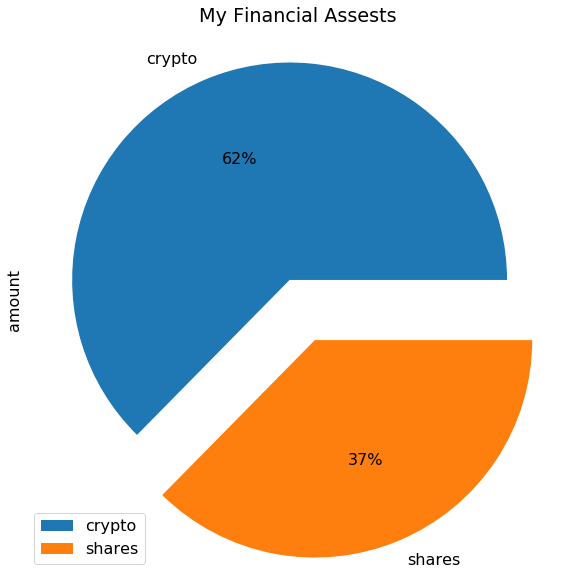

In [12]:
# Plot savings pie chart. Changed the parameters for better visualization

explode = (0.1, 0.2)
plt.rcParams.update({'font.size': 16})
df_savings.plot(kind='pie', figsize = (20, 10), x="crypto", y="amount", 
                title = "My Financial Assests", autopct = "%d%%", explode= explode)


In [13]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3

# Calculate total amount of savings

current_savings = crypto + stocks


# Validate saving health

if current_savings > emergency_fund:
    print(f"Congratulations, your savings total of ${current_savings:0.2f} is ${round((current_savings - emergency_fund), 2)} more than ideal emergency fund!")
elif current_savings == emergency_fund:
    print(f"Congratulations for reaching your financial goal of:  ${round(emergency_fund, 2)}.")
else:
    goal_amount = round((emergency_fund - current_savings), 2)
    print(f"You are ${goal_amount} short of your ideal emergency fund of: ${round((emergency_fund), 2)}. ")

Congratulations, your savings total of $121457.31 is $85457.31 more than ideal emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Get 5 years' worth of historical data for SPY and AGG

start_date_30 = pd.Timestamp("2016-08-21", tz="America/New_York").isoformat()
end_date_30 = pd.Timestamp("2021-08-21", tz="America/New_York").isoformat()

# Set the tickers

tickers_30 = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = api.get_barset(
    tickers_30,
    timeframe,
    start=start_date_30,
    end=end_date_30,
    limit=1000
).df

df_stock_data = df_stock_data.dropna()

# Display sample data

df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
2017-08-31 00:00:00-04:00  110.31  110.4600  110.3100  110.435  4179400   
2017-09-01 00:00:00-04:00  110.19  110.2200  109.9100  109.960  2579681   
2017-09-05 00:00:00-04:00  110.27  110.4972  110.2100  110.420  1922189   
2017-09-06 00:00:00-04:00  110.42  110.5200  110.2301  110.290  2476931   
2017-09-07 00:00:00-04:00  110.43  110.6600  110.4200  110.580  1526058   

                              SPY                                    
                             open    high     low   close    volume  
2017-08-31 00:00:00-04:00  246.73  247.77  246.61  247.42  52550897  
2017-09-01 00:00:00-04:00  247.92  248.33  247.67  247.88  39588857  
2017-09-05 00:00:00-04:00  247.24  247.52  244.95  246.10  66628408  
2017-09-06 00:00:00-04:00  246.84  247.28  246.23  246.91  44577397  
2017-09-07 00:00:00-04:00  247.26  247.27  246.40  246.89  38558992

In [15]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Added 40% and 60% weights for "AAG" and "SPY" stocks respectively

MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 1000,
    num_trading_days = 252*30
)   

In [16]:
# Printing the simulation input data

MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
2017-08-31 00:00:00-04:00  110.31  110.4600  110.3100  110.435  4179400   
2017-09-01 00:00:00-04:00  110.19  110.2200  109.9100  109.960  2579681   
2017-09-05 00:00:00-04:00  110.27  110.4972  110.2100  110.420  1922189   
2017-09-06 00:00:00-04:00  110.42  110.5200  110.2301  110.290  2476931   
2017-09-07 00:00:00-04:00  110.43  110.6600  110.4200  110.580  1526058   

                                           SPY                          \
                          daily_return    open    high     low   close   
2017-08-31 00:00:00-04:00          NaN  246.73  247.77  246.61  247.42   
2017-09-01 00:00:00-04:00    -0.004301  247.92  248.33  247.67  247.88   
2017-09-05 00:00:00-04:00     0.004183  247.24  247.52  244.95  246.10   
2017-09-06 00:00:00-04:00    -0.001177  246.84  247.28  246.23  246.91   
2017-09-07 00:00:00-04:00     0.002629  247.26  247.27  246.40  246.89   

                                                  
                             volume daily_return  
2017-08-31 00:00:00-04:00  52550897          NaN  
2017-09-01 00:00:00-04:00  39588857     0.001859  
2017-09-05 00:00:00-04:00  66628408    -0.007181  
2017-09-06 00:00:00-04:00  44577397     0.003291  
2017-09-07 00:00:00-04:00  38558992    -0.000081

In [17]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001706,0.983713,1.003972,0.994287,0.994561,1.002459,1.000057,0.991894,0.996473,0.993114,...,0.990211,1.002588,1.007023,1.001959,0.997899,1.009736,0.995798,0.993853,1.016139,1.001815
2,1.001952,0.982217,1.008651,1.003471,0.997560,1.004579,1.006346,0.980170,0.998561,0.995497,...,0.990224,1.004236,0.987439,1.003409,1.003509,1.023592,0.998879,0.990936,1.014837,0.997550
3,0.998403,0.979466,1.003118,1.011475,0.987256,1.004389,1.004146,0.974939,0.999163,1.002624,...,0.988241,1.000272,0.974417,0.998693,1.011740,1.035430,0.984218,0.985983,1.006556,0.997250
4,0.995477,0.994736,1.000012,1.017385,0.987735,0.996551,1.017732,0.977644,0.995865,1.012880,...,0.975263,1.006613,0.959634,0.999821,1.013607,1.040461,0.994306,0.993496,0.997101,0.990150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,24.248690,15.500069,71.847348,47.167355,6.122291,13.210310,22.301599,11.174716,45.407788,5.900708,...,26.302397,48.716498,13.968003,10.064473,8.611440,32.328300,18.780949,30.020755,8.378941,57.788607
7557,24.088375,15.286341,71.320574,47.539291,6.113300,13.123468,22.743976,11.363171,44.858634,5.965293,...,26.526795,48.756197,13.962171,10.095788,8.595712,32.394255,18.709431,29.861124,8.296499,58.387818
7558,24.327404,15.299822,71.466644,47.580572,6.026667,13.056591,22.828854,11.240793,44.926989,5.966778,...,26.407161,48.748361,14.156039,10.323888,8.697569,32.796910,18.820033,29.981054,8.159419,57.951119
7559,24.427903,15.476897,70.705109,47.674317,6.031470,12.906407,22.819967,11.284003,44.516229,6.003068,...,26.528172,49.023465,14.119605,10.287788,8.714182,32.573026,18.987192,30.085943,8.251026,57.695808


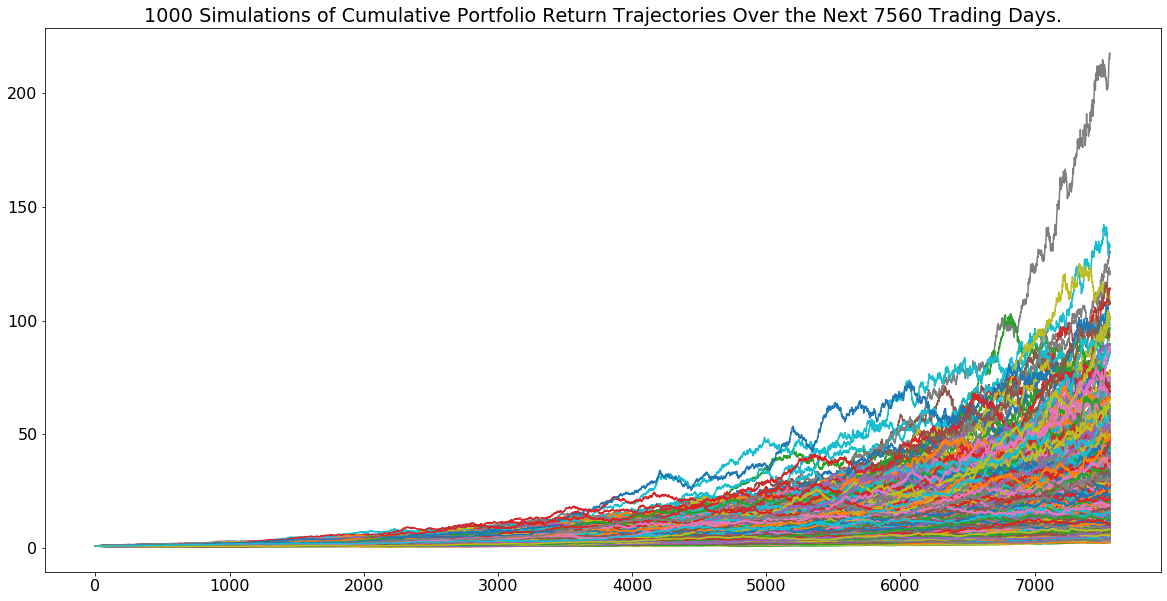

In [18]:
# Plot simulation outcomes. Changed plot figure size in MCForecastTool.py file

line_plot = MC_even_dist.plot_simulation()

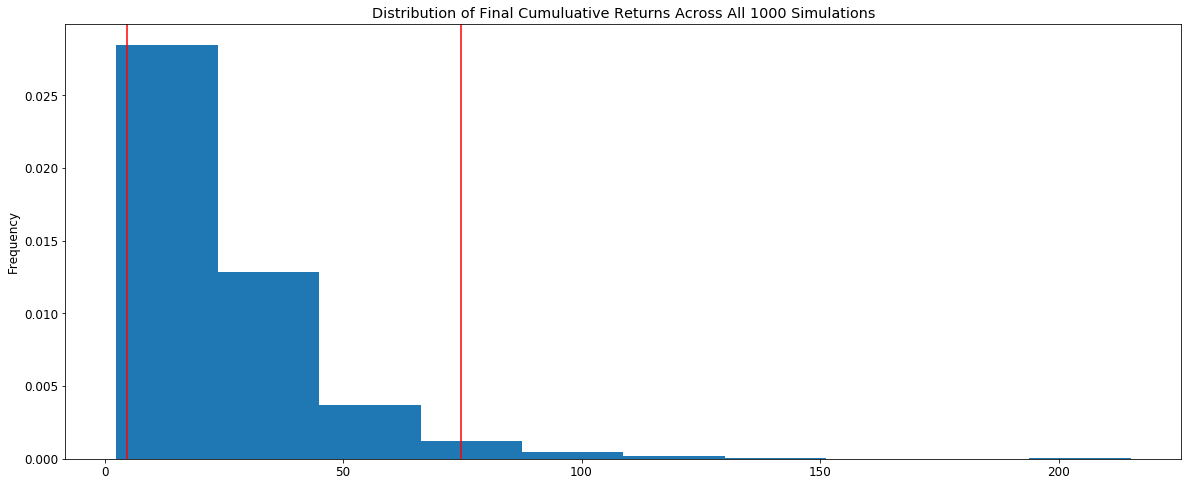

In [20]:
# Plot probability distribution and confidence intervals
# Changed plot parameters for better visualization

dist_plot = MC_even_dist.plot_distribution()
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize':(20,8)})

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results

ci_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics

print(ci_tbl)

count           1000.000000
mean              24.716630
std               19.605071
min                2.434138
25%               12.019169
50%               19.085321
75%               30.625649
max              215.128044
95% CI Lower       4.701989
95% CI Upper      74.716193
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment

initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(ci_tbl[8]*initial_investment, 2)
ci_upper = round(ci_tbl[9]*initial_investment, 2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $94039.78 and $1494323.86


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment

initial_investment_50 = 20000 * 1.5


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower_50 = round(ci_tbl[8]*initial_investment_50, 2)
ci_upper_50 = round(ci_tbl[9]*initial_investment_50, 2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment_50} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_50} and ${ci_upper_50}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $141059.66 and $2241485.79


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

ticker_five = ['GOOG', 'AAPL', 'COST']

start_date_five = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date_five = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

timeframe = "1D"


df_ticker_five = api.get_barset(
    ticker_five,
    timeframe,
    start=start_date_five,
    end=end_date_five,
    limit=1000
).df


df_ticker_five

AAPL                                        \
                             open    high      low     close     volume   
2017-05-11 00:00:00-04:00  152.45  154.07  152.310  153.9400   18750732   
2017-05-12 00:00:00-04:00  154.70  156.42  154.670  156.1000   28076625   
2017-05-15 00:00:00-04:00  156.01  156.65  155.050  155.6800   19310853   
2017-05-16 00:00:00-04:00  155.94  156.06  154.720  155.4700   15904981   
2017-05-17 00:00:00-04:00  153.60  154.57  149.710  150.2000   42477277   
...                           ...     ...      ...       ...        ...   
2021-04-26 00:00:00-04:00  134.83  135.06  133.560  134.7300   56214327   
2021-04-27 00:00:00-04:00  135.06  135.41  134.110  134.3900   58753666   
2021-04-28 00:00:00-04:00  134.29  135.02  133.080  133.7801   80514624   
2021-04-29 00:00:00-04:00  136.47  137.07  132.450  133.4800  140513376   
2021-04-30 00:00:00-04:00  131.80  133.56  131.065  131.5300   96118913   

                             COST                                      GOOG  \
                             open    high     low   close   volume     open   
2017-05-11 00:00:00-04:00  170.78  171.55  170.10  171.26  1495259   925.32   
2017-05-12 00:00:00-04:00  171.29  171.85  168.70  168.89  1036754   931.53   
2017-05-15 00:00:00-04:00  168.30  171.98  168.30  171.58  1166080   932.95   
2017-05-16 00:00:00-04:00  171.96  171.96  170.63  171.00   831448   940.00   
2017-05-17 00:00:00-04:00  170.66  171.50  167.05  167.18  1452154   935.67   
...                           ...     ...     ...     ...      ...      ...   
2021-04-26 00:00:00-04:00  373.90  373.90  368.21  368.50  1681161  2319.51   
2021-04-27 00:00:00-04:00  368.46  370.96  365.29  370.21  1516949  2332.26   
2021-04-28 00:00:00-04:00  369.51  370.50  368.18  369.62  1047484  2407.23   
2021-04-29 00:00:00-04:00  368.48  374.71  368.30  373.73  1586423  2410.07   
2021-04-30 00:00:00-04:00  372.65  374.16  371.33  372.07  1369737  2407.93   

                                                                    
                                high        low     close   volume  
2017-05-11 00:00:00-04:00   932.5300   923.0301   930.680   503692  
2017-05-12 00:00:00-04:00   933.4400   927.8500   932.200   618425  
2017-05-15 00:00:00-04:00   938.2500   929.3400   937.080   580603  
2017-05-16 00:00:00-04:00   943.1100   937.5800   943.000   596331  
2017-05-17 00:00:00-04:00   939.3325   918.1400   919.840  1539644  
...                              ...        ...       ...      ...  
2021-04-26 00:00:00-04:00  2341.2600  2313.8400  2329.200   884316  
2021-04-27 00:00:00-04:00  2337.4500  2304.2700  2307.735  1173067  
2021-04-28 00:00:00-04:00  2452.3780  2374.8500  2380.270  2687402  
2021-04-29 00:00:00-04:00  2436.5200  2402.2800  2429.890  1766759  
2021-04-30 00:00:00-04:00  2427.1400  2402.1600  2408.910  1690524  

[1000 rows x 15 columns]

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# Used 40%, 30%, 30% weights for "GOOG", "AAPL", "COST" stocks respectively

MC_even_dist_five = MCSimulation(
    portfolio_data = df_ticker_five,
    weights = [.40, .30, .30],
    num_simulation = 1000,
    num_trading_days = 252*5
)

MC_even_dist_five.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
2017-05-11 00:00:00-04:00  152.45  154.07  152.31  153.94  18750732   
2017-05-12 00:00:00-04:00  154.70  156.42  154.67  156.10  28076625   
2017-05-15 00:00:00-04:00  156.01  156.65  155.05  155.68  19310853   
2017-05-16 00:00:00-04:00  155.94  156.06  154.72  155.47  15904981   
2017-05-17 00:00:00-04:00  153.60  154.57  149.71  150.20  42477277   

                                          COST                          \
                          daily_return    open    high     low   close   
2017-05-11 00:00:00-04:00          NaN  170.78  171.55  170.10  171.26   
2017-05-12 00:00:00-04:00     0.014031  171.29  171.85  168.70  168.89   
2017-05-15 00:00:00-04:00    -0.002691  168.30  171.98  168.30  171.58   
2017-05-16 00:00:00-04:00    -0.001349  171.96  171.96  170.63  171.00   
2017-05-17 00:00:00-04:00    -0.033897  170.66  171.50  167.05  167.18   

                                                   GOOG                      \
                            volume daily_return    open      high       low   
2017-05-11 00:00:00-04:00  1495259          NaN  925.32  932.5300  923.0301   
2017-05-12 00:00:00-04:00  1036754    -0.013839  931.53  933.4400  927.8500   
2017-05-15 00:00:00-04:00  1166080     0.015928  932.95  938.2500  929.3400   
2017-05-16 00:00:00-04:00   831448    -0.003380  940.00  943.1100  937.5800   
2017-05-17 00:00:00-04:00  1452154    -0.022339  935.67  939.3325  918.1400   

                                                         
                            close   volume daily_return  
2017-05-11 00:00:00-04:00  930.68   503692          NaN  
2017-05-12 00:00:00-04:00  932.20   618425     0.001633  
2017-05-15 00:00:00-04:00  937.08   580603     0.005235  
2017-05-16 00:00:00-04:00  943.00   596331     0.006317  
2017-05-17 00:00:00-04:00  919.84  1539644    -0.024560

In [26]:
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005274,0.987822,1.009191,1.012931,1.019478,1.015122,1.001600,1.002335,0.988631,0.979510,...,1.012674,0.999102,0.985080,0.991152,1.005206,0.996316,0.997440,0.994721,1.000220,0.995352
2,1.005405,1.011992,1.013478,1.005875,1.029099,1.022654,1.017221,1.016563,1.018548,0.970092,...,0.985777,1.012898,1.001941,0.986677,1.025457,0.998267,1.006715,0.983684,1.002806,1.002630
3,0.996952,0.998453,1.007951,1.008903,1.027013,1.046187,1.013205,1.002165,1.022727,0.968843,...,0.951019,1.016657,1.016969,0.987230,1.049166,0.999819,1.013428,0.993403,1.017471,1.002705
4,0.995731,0.966199,1.002792,0.991305,1.037074,1.049220,1.021920,1.005376,1.023106,0.963695,...,0.969457,1.016836,1.015556,0.971354,1.083588,0.976069,0.994507,1.010509,1.032694,0.995388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.003433,5.868221,4.295268,6.662310,1.763194,2.861002,1.853388,3.145007,1.872583,2.065439,...,0.869819,6.705426,2.475195,1.003522,2.590026,2.290191,1.129245,2.818716,1.587537,1.833957
1257,2.038414,5.831881,4.407773,6.705781,1.788846,2.880928,1.845641,3.125574,1.858524,2.116640,...,0.861739,6.749227,2.456587,1.012616,2.595281,2.259441,1.110747,2.802474,1.602720,1.915723
1258,2.029710,5.803682,4.300049,6.634267,1.756105,2.910127,1.814753,3.118314,1.821157,2.153688,...,0.862965,6.738350,2.518659,0.990035,2.607109,2.318128,1.125846,2.805076,1.572709,1.943878
1259,2.067654,5.840663,4.337217,6.680405,1.771962,2.997941,1.847571,3.101565,1.823021,2.166156,...,0.863649,6.883699,2.551306,0.993377,2.627981,2.316639,1.101624,2.824937,1.550655,1.972476


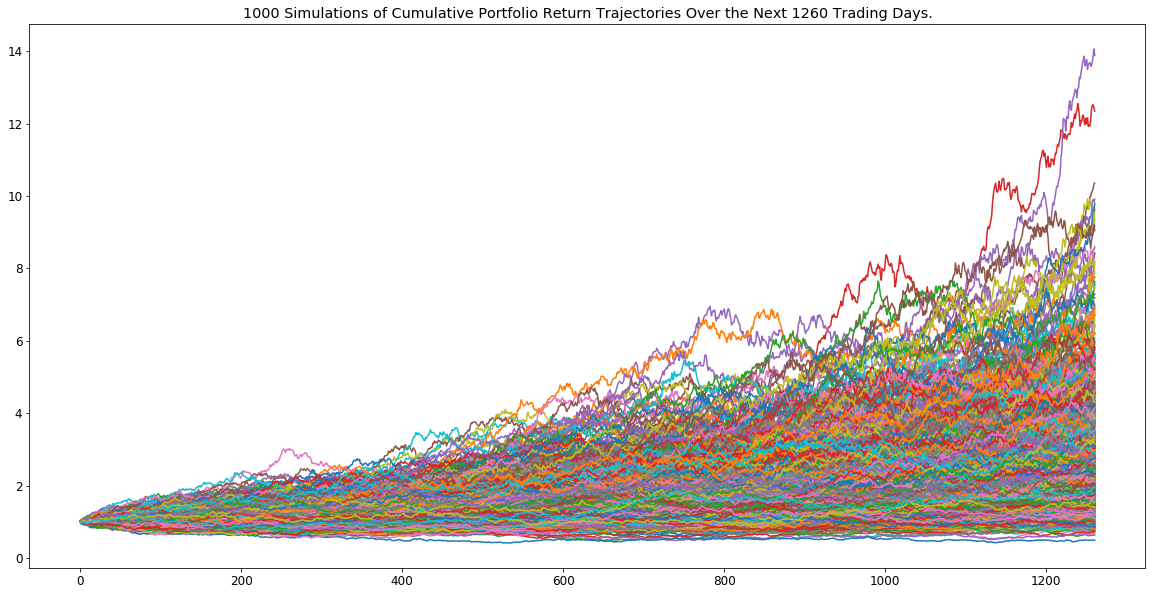

In [27]:
# Plot simulation outcomes. Changed MCForecastTools plot parameters for better visualization

line_plot_five = MC_even_dist_five.plot_simulation()

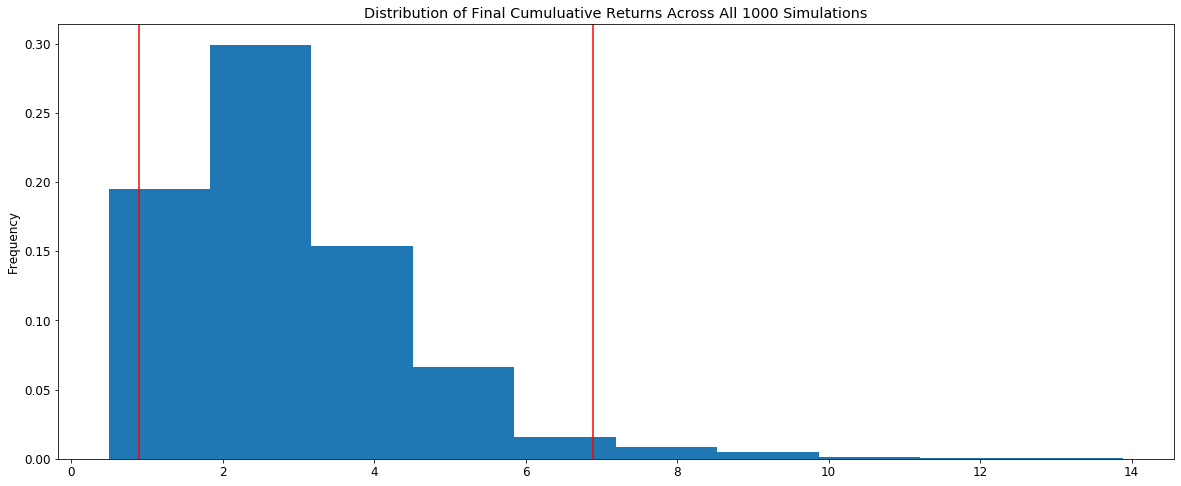

In [28]:
# Plot probability distribution and confidence intervals
# Changed the plot parameters for better visualization

dist_plot_five = MC_even_dist_five.plot_distribution()
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize':(20,8)})

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results

five_tbl = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics

print(five_tbl)

count           1000.000000
mean               2.908487
std                1.587228
min                0.489471
25%                1.782657
50%                2.559643
75%                3.690708
max               13.888230
95% CI Lower       0.895193
95% CI Upper       6.887852
Name: 1260, dtype: float64


In [30]:
# Set initial investment

initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(five_tbl[8]*initial_investment_five, 2)
ci_upper_five = round(five_tbl[9]*initial_investment_five, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53711.6 and $413271.11


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

ticker_ten = ['GOOG', 'AAPL', 'COST']

start_date_ten = pd.Timestamp('2011-05-01', tz='America/New_York').isoformat()
end_date_ten = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

timeframe = "1D"


df_ticker_ten = api.get_barset(
    ticker_ten,
    timeframe,
    start=start_date_ten,
    end=end_date_ten,
    limit=1000
).df


df_ticker_ten

AAPL                                        \
                             open    high      low     close     volume   
2017-05-11 00:00:00-04:00  152.45  154.07  152.310  153.9400   18750732   
2017-05-12 00:00:00-04:00  154.70  156.42  154.670  156.1000   28076625   
2017-05-15 00:00:00-04:00  156.01  156.65  155.050  155.6800   19310853   
2017-05-16 00:00:00-04:00  155.94  156.06  154.720  155.4700   15904981   
2017-05-17 00:00:00-04:00  153.60  154.57  149.710  150.2000   42477277   
...                           ...     ...      ...       ...        ...   
2021-04-26 00:00:00-04:00  134.83  135.06  133.560  134.7300   56214327   
2021-04-27 00:00:00-04:00  135.06  135.41  134.110  134.3900   58752508   
2021-04-28 00:00:00-04:00  134.29  135.02  133.080  133.7801   80514624   
2021-04-29 00:00:00-04:00  136.47  137.07  132.450  133.4800  140511638   
2021-04-30 00:00:00-04:00  131.80  133.56  131.065  131.5300   96118913   

                             COST                                      GOOG  \
                             open    high     low   close   volume     open   
2017-05-11 00:00:00-04:00  170.78  171.55  170.10  171.26  1495259   925.32   
2017-05-12 00:00:00-04:00  171.29  171.85  168.70  168.89  1036754   931.53   
2017-05-15 00:00:00-04:00  168.30  171.98  168.30  171.58  1166080   932.95   
2017-05-16 00:00:00-04:00  171.96  171.96  170.63  171.00   831448   940.00   
2017-05-17 00:00:00-04:00  170.66  171.50  167.05  167.18  1452154   935.67   
...                           ...     ...     ...     ...      ...      ...   
2021-04-26 00:00:00-04:00  373.90  373.90  368.21  368.50  1681161  2319.51   
2021-04-27 00:00:00-04:00  368.46  370.96  365.29  370.21  1517049  2332.26   
2021-04-28 00:00:00-04:00  369.51  370.50  368.18  369.62  1047484  2407.23   
2021-04-29 00:00:00-04:00  368.48  374.71  368.30  373.73  1586423  2410.07   
2021-04-30 00:00:00-04:00  372.65  374.16  371.33  372.07  1369737  2407.93   

                                                                    
                                high        low     close   volume  
2017-05-11 00:00:00-04:00   932.5300   923.0301   930.680   503692  
2017-05-12 00:00:00-04:00   933.4400   927.8500   932.200   618425  
2017-05-15 00:00:00-04:00   938.2500   929.3400   937.080   580603  
2017-05-16 00:00:00-04:00   943.1100   937.5800   943.000   596331  
2017-05-17 00:00:00-04:00   939.3325   918.1400   919.840  1539644  
...                              ...        ...       ...      ...  
2021-04-26 00:00:00-04:00  2341.2600  2313.8400  2329.200   884316  
2021-04-27 00:00:00-04:00  2337.4500  2304.2700  2307.735  1173067  
2021-04-28 00:00:00-04:00  2452.3780  2374.8500  2380.270  2687402  
2021-04-29 00:00:00-04:00  2436.5200  2402.2800  2429.890  1766759  
2021-04-30 00:00:00-04:00  2427.1400  2402.1600  2408.910  1690524  

[1000 rows x 15 columns]

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# Used 40%, 30%, 30% weights for "GOOG", "AAPL", "COST" stocks respectively

MC_even_dist_ten = MCSimulation(
    portfolio_data = df_ticker_ten,
    weights = [.40, .30, .30],
    num_simulation = 1000,
    num_trading_days = 252*10
)

MC_even_dist_ten.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
2017-05-11 00:00:00-04:00  152.45  154.07  152.31  153.94  18750732   
2017-05-12 00:00:00-04:00  154.70  156.42  154.67  156.10  28076625   
2017-05-15 00:00:00-04:00  156.01  156.65  155.05  155.68  19310853   
2017-05-16 00:00:00-04:00  155.94  156.06  154.72  155.47  15904981   
2017-05-17 00:00:00-04:00  153.60  154.57  149.71  150.20  42477277   

                                          COST                          \
                          daily_return    open    high     low   close   
2017-05-11 00:00:00-04:00          NaN  170.78  171.55  170.10  171.26   
2017-05-12 00:00:00-04:00     0.014031  171.29  171.85  168.70  168.89   
2017-05-15 00:00:00-04:00    -0.002691  168.30  171.98  168.30  171.58   
2017-05-16 00:00:00-04:00    -0.001349  171.96  171.96  170.63  171.00   
2017-05-17 00:00:00-04:00    -0.033897  170.66  171.50  167.05  167.18   

                                                   GOOG                      \
                            volume daily_return    open      high       low   
2017-05-11 00:00:00-04:00  1495259          NaN  925.32  932.5300  923.0301   
2017-05-12 00:00:00-04:00  1036754    -0.013839  931.53  933.4400  927.8500   
2017-05-15 00:00:00-04:00  1166080     0.015928  932.95  938.2500  929.3400   
2017-05-16 00:00:00-04:00   831448    -0.003380  940.00  943.1100  937.5800   
2017-05-17 00:00:00-04:00  1452154    -0.022339  935.67  939.3325  918.1400   

                                                         
                            close   volume daily_return  
2017-05-11 00:00:00-04:00  930.68   503692          NaN  
2017-05-12 00:00:00-04:00  932.20   618425     0.001633  
2017-05-15 00:00:00-04:00  937.08   580603     0.005235  
2017-05-16 00:00:00-04:00  943.00   596331     0.006317  
2017-05-17 00:00:00-04:00  919.84  1539644    -0.024560

In [33]:
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011917,0.984916,0.977169,1.021810,1.004021,0.980856,0.996535,1.006869,1.006324,1.004150,...,1.007967,1.003586,1.016863,1.022921,1.026141,1.007138,1.004106,0.998791,0.999769,1.005958
2,1.014314,0.945361,0.959616,1.043358,0.998995,0.954007,0.995048,1.003669,0.990079,1.003931,...,1.008397,1.014989,1.014551,1.026127,1.023209,1.003018,0.991219,0.997735,1.014031,0.981935
3,1.034406,0.927775,0.962119,1.078419,1.010584,0.924014,0.998635,1.029909,0.977858,0.980355,...,0.998153,1.005403,1.013233,1.016483,1.021223,1.014747,0.999242,0.981018,1.031350,0.986214
4,1.054770,0.931695,0.986970,1.075786,1.023256,0.929898,1.018606,1.042082,0.977327,0.976402,...,1.034297,1.024280,1.024122,1.011508,1.023146,1.017970,0.989417,0.976594,1.041294,0.983773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,13.430596,7.102642,3.323469,12.949433,1.951797,4.518330,1.323055,15.321021,28.016592,17.780840,...,4.868928,6.498567,7.385805,13.627443,5.191085,4.171676,6.899589,16.790328,4.085238,18.833609
2517,13.240437,7.057526,3.298609,12.797453,1.988657,4.478414,1.327890,15.094944,28.269399,17.854306,...,4.989180,6.577338,7.491149,13.478347,5.134883,4.133808,6.977038,17.092843,4.072224,19.249496
2518,13.473475,7.155345,3.291742,12.435225,1.983362,4.500124,1.334891,15.089545,28.390102,17.987498,...,4.975166,6.774183,7.424220,13.539221,5.107317,4.105405,7.002575,17.359003,4.108740,19.427656
2519,13.791231,7.115608,3.283773,12.525312,1.975408,4.623824,1.306130,14.795639,27.705004,17.805982,...,4.925682,6.734277,7.406641,13.415607,4.992036,4.057562,7.050209,17.243107,4.087145,19.923789


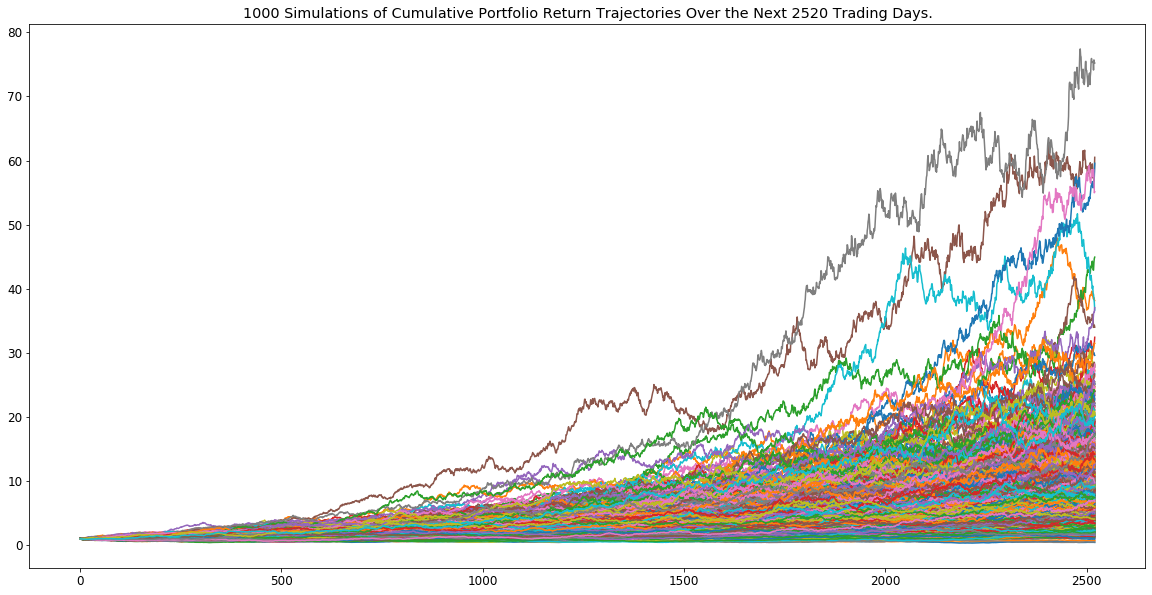

In [34]:
# Plot simulation outcomes

line_plot_ten = MC_even_dist_ten.plot_simulation()

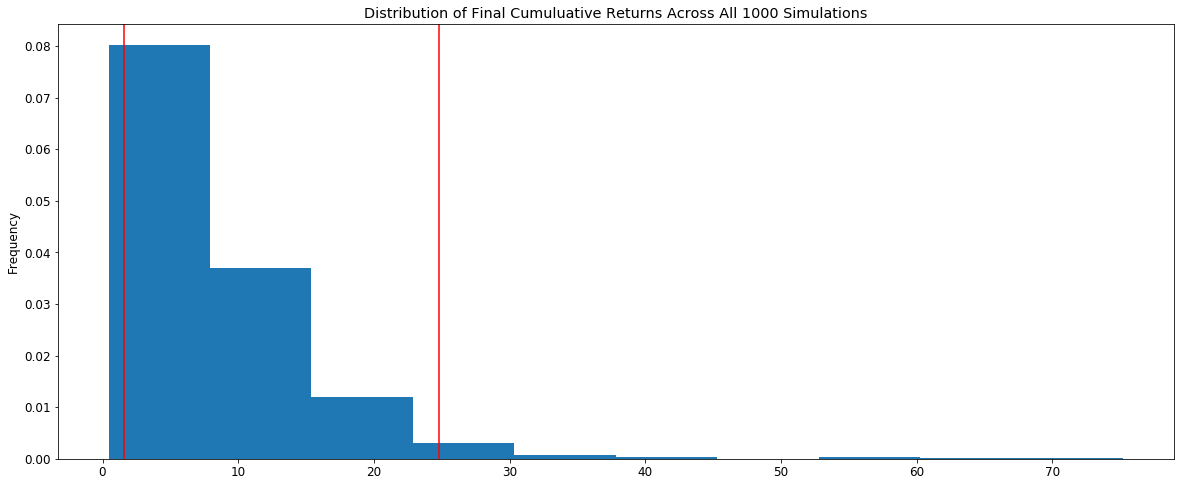

In [35]:
# Plot probability distribution and confidence intervals
# Changed plot parameters for better visualization

dist_plot_ten = MC_even_dist_ten.plot_distribution()
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize':(20,8)})

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results

ten_tbl = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics

print(ten_tbl)

count           1000.000000
mean               8.611321
std                6.811353
min                0.445658
25%                4.345459
50%                6.704440
75%               11.014798
max               75.202181
95% CI Lower       1.595482
95% CI Upper      24.796723
Name: 2520, dtype: float64


In [37]:
# Set initial investment

initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_ten = round(ten_tbl[8]*initial_investment_ten, 2)
ci_upper_ten = round(ten_tbl[9]*initial_investment_ten, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $95728.89 and $1487803.4
